In [1]:
import os
import sys
root_path = os.path.abspath("../../../")
if root_path not in sys.path:
    sys.path.append(root_path)

from Util.Util import DataUtil

(x_train, y_train), (x_test, y_test) = DataUtil.gen_noisy_linear(one_hot=False)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18, 8)

def draw_losses(*models):
    plt.figure()
    for nn in models:
        name = str(nn)
        el, tl = nn.log["epoch_loss"], nn.log["test_snapshot_loss"]
        ee_base = np.arange(len(el))
        cse_base = np.linspace(0, len(el) - 1, len(tl))
        plt.plot(ee_base, el, label="Train loss ({})".format(name))
        plt.plot(cse_base, tl, label="Test loss ({})".format(name))
        plt.legend()
    plt.show()

In [3]:
from Toolbox import DT2NN

def get_params(activations):
    return {"model_param_settings": {
        "activations": activations,
        "n_epoch": 32, "n_iter": 128
    }}

sign_one_hot = DT2NN(**get_params(["sign", "one_hot"])).fit(x_train, y_train, x_test, y_test, snapshot_ratio=0)
sign_softmax = DT2NN(**get_params(["sign", "softmax"])).fit(x_train, y_train, x_test, y_test, snapshot_ratio=0)
tanh_softmax = DT2NN(**get_params(["tanh", "softmax"])).fit(x_train, y_train, x_test, y_test, snapshot_ratio=0)

Decision Tree performance
------------------------------------------------------------
acc  -  Train :      1.0   CV :    0.818
------------------------------------------------------------
Initial performance
------------------------------------------------------------
acc  -  Train :      1.0   CV :    0.818   Test : None
------------------------------------------------------------
Epoch    0   Iter        0   Snapshot      0 (acc)  -  Train :      1.0   Test :    0.818
Epoch   32   Iter     4096   Snapshot     32 (acc)  -  Train :      1.0   Test :    0.818  -  Time Cost: 8.771988153457642
Decision Tree performance
------------------------------------------------------------
acc  -  Train :      1.0   CV : 0.810667
------------------------------------------------------------
Initial performance
------------------------------------------------------------
acc  -  Train :      1.0   CV : 0.810667   Test : None
------------------------------------------------------------
Epoch    0   It

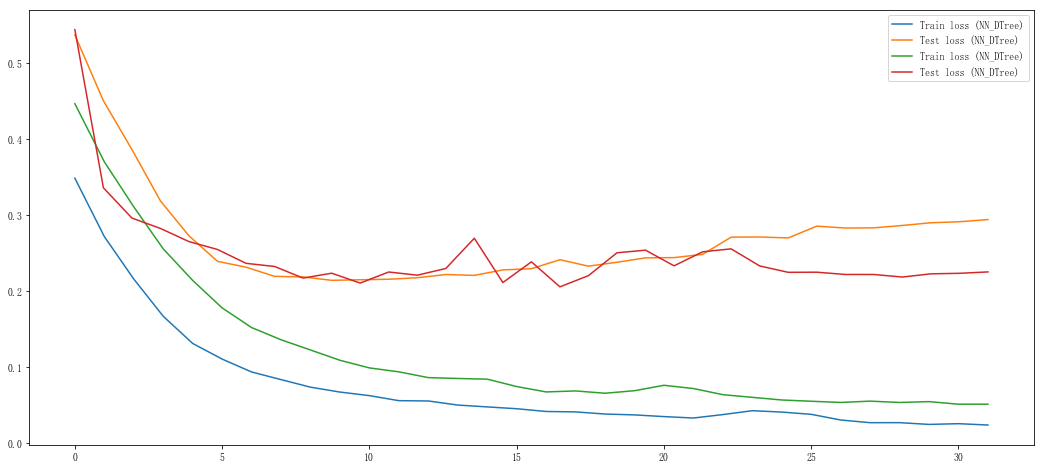

In [4]:
draw_losses(sign_softmax, tanh_softmax)